# Simple Linear Regression

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Reading the dataset

In [2]:
import pandas as pd
df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### I want to understand relationship between RND and PROFIT
### PROFIT ~ RND
### Profit_Pred = Bo + B1*RND
### X = RND, Y = PROFIT

In [27]:
X = df[["RND"]]
Y = df[["PROFIT"]]

In [28]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [29]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


<Axes: xlabel='RND', ylabel='PROFIT'>

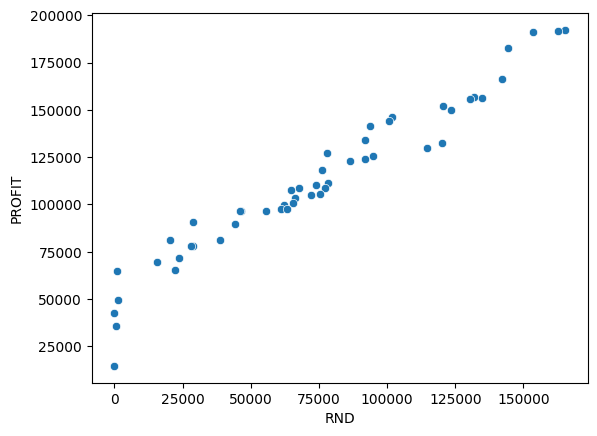

In [30]:
import seaborn as sns
sns.scatterplot(data=df, x="RND", y="PROFIT")

### Step 3 - Perform Model Building

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

### Get slope and intercept

In [33]:
model.intercept_

array([49032.89914125])

In [34]:
model.coef_

array([[0.85429137]])

### Here Bo = 49032.89914125 (i.e. intercept)
### B1 = 0.85429137 (i.e. coefficient)
### Profit_pred = 49032.9 + 0.8543*RND

### Regression Plot

<Axes: xlabel='RND', ylabel='PROFIT'>

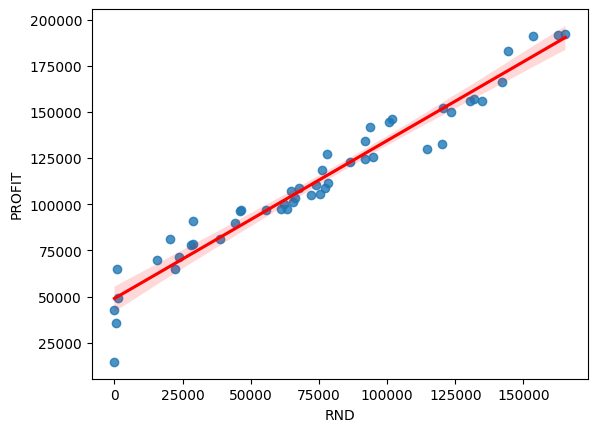

In [35]:
sns.regplot(data=df, x="RND", y="PROFIT", line_kws={"color": "red"})

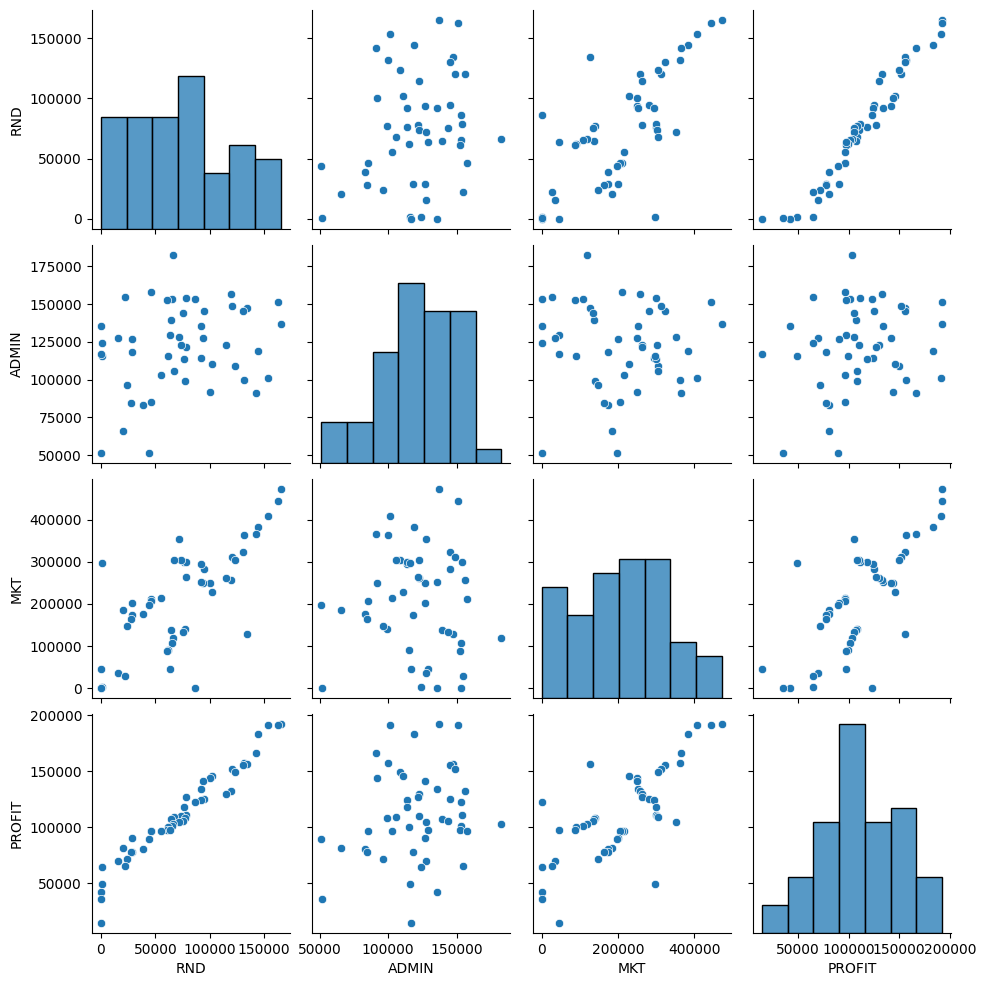

In [36]:
sns.pairplot(data=df)

In [37]:
ypred = model.predict(X)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [38]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Model Evaluation
1. Root Mean Squared Error
2. Mean Absolute Error
3. Mean Absolute Percentage Error
4. Coefficient of Determination (R-squared)

In [39]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

In [43]:
def evaluate_model(model, x, y):
    # Predict the results
    ypred = model.predict(x)
    # Evaluate the metrics
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    # Print the metrics
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MAPE: {mape:.4F}")
    print(f"R2 Score: {r2:.4f}")

In [44]:
evaluate_model(model, X, Y)

RMSE: 9226.10
MAE: 6910.98
MAPE: 0.1107
R2 Score: 0.9465


### From above R2 score is 0.9465 > 0.8 hence it is a good model and can be used for out of sample predictions.

### Out of sample prediction

In [45]:
X.values[0:5]

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34]])

In [48]:
rnd = [[1_50_000]]
model.predict(rnd)

array([[177176.60478207]])

### Profit Predicted = Bo + B1*RND
### Profit_pred = 49032.9 + 0.8543*RND

In [49]:
49032.9 + 0.8543 * 150000

177177.9

### Conclusion:
### If RND increases by 1 unit Profit will increase by 0.8543
### If RND increases by 1000, Profit will increase by 854.3